<a href="https://colab.research.google.com/github/tadedavis/gitpractice/blob/main/power_grid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array
import pandas as pd
from statistics import mean
from numpy import argmin, argmax, std
import keras
from keras.models import Sequential
from keras.layers import LSTM, GRU , SimpleRNN,  BatchNormalization
from keras.layers import Dense, Flatten

In [ ]:
train_size = 14400
predict_size = 3600

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
df = pd.read_csv('germany_2020_01.csv', on_bad_lines='skip')
df.dropna(inplace=True)
all_data = df['Frequency'].values.astype(int)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
# train_data_normalized = scaler.fit_transform(all_data .reshape(-1, 1))
# train_data_normalized = train_data_normalized.reshape(-1,1)
train_data_normalized = all_data
raw_seq = train_data_normalized[:train_size]
n_steps = predict_size
batch_size = 72

In [ ]:
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(SimpleRNN(50, input_shape=( n_steps, n_features), dropout=0.1))
model.add(Flatten())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, batch_size=batch_size, epochs=25, verbose=2)

Epoch 1/25
150/150 - 120s - loss: 188.3994 - 120s/epoch - 799ms/step
Epoch 2/25
150/150 - 107s - loss: 73.3603 - 107s/epoch - 715ms/step
Epoch 3/25
150/150 - 109s - loss: 42.1829 - 109s/epoch - 725ms/step
Epoch 4/25
150/150 - 106s - loss: 28.3684 - 106s/epoch - 705ms/step
Epoch 5/25
150/150 - 107s - loss: 19.2952 - 107s/epoch - 712ms/step
Epoch 6/25
150/150 - 108s - loss: 14.4615 - 108s/epoch - 720ms/step
Epoch 7/25
150/150 - 105s - loss: 14.4528 - 105s/epoch - 703ms/step
Epoch 8/25
150/150 - 108s - loss: 9.9294 - 108s/epoch - 720ms/step
Epoch 9/25
150/150 - 107s - loss: 8.2158 - 107s/epoch - 711ms/step
Epoch 10/25
150/150 - 106s - loss: 7.0203 - 106s/epoch - 706ms/step
Epoch 11/25
150/150 - 107s - loss: 6.1004 - 107s/epoch - 713ms/step
Epoch 12/25
150/150 - 106s - loss: 6.0087 - 106s/epoch - 705ms/step
Epoch 13/25
150/150 - 106s - loss: 5.6627 - 106s/epoch - 710ms/step
Epoch 14/25
150/150 - 107s - loss: 8.6113 - 107s/epoch - 711ms/step
Epoch 15/25
150/150 - 105s - loss: 22.3095 - 105s

In [ ]:
from keras.metrics.metrics import mean_squared_error
rnn_scores = []
rnn_losses = []
for i in range(predict_size):
  x_input = train_data_normalized[train_size + i:train_size + predict_size + i]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  if yhat > 15:
    train_data_normalized[train_size + predict_size + i + 2] += -1 
  elif yhat < -15:
    train_data_normalized[train_size + predict_size + i + 2] += 1
  ytruth = train_data_normalized[len(x_input) + i]
  single_loss = mean_squared_error(yhat, ytruth)
  rnn_losses.append(single_loss.numpy()[0])
  rnn_scores.append(yhat.item())

In [ ]:
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(n_steps, n_features), dropout=0.1))
lstm_model.add(Flatten())
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(optimizer='adam', loss='mse')
# fit model
lstm_model.fit(X, y, epochs=25, verbose=2)


Epoch 1/25
338/338 - 32s - loss: 157.3406 - 32s/epoch - 95ms/step
Epoch 2/25
338/338 - 31s - loss: 30.6290 - 31s/epoch - 90ms/step
Epoch 3/25
338/338 - 32s - loss: 11.4844 - 32s/epoch - 94ms/step
Epoch 4/25
338/338 - 31s - loss: 6.6002 - 31s/epoch - 92ms/step
Epoch 5/25
338/338 - 31s - loss: 4.5248 - 31s/epoch - 91ms/step
Epoch 6/25
338/338 - 31s - loss: 3.4346 - 31s/epoch - 91ms/step
Epoch 7/25
338/338 - 31s - loss: 2.7098 - 31s/epoch - 91ms/step
Epoch 8/25
338/338 - 31s - loss: 2.2483 - 31s/epoch - 91ms/step
Epoch 9/25
338/338 - 31s - loss: 1.8279 - 31s/epoch - 91ms/step
Epoch 10/25
338/338 - 32s - loss: 1.5692 - 32s/epoch - 95ms/step
Epoch 11/25
338/338 - 31s - loss: 1.3444 - 31s/epoch - 91ms/step
Epoch 12/25
338/338 - 31s - loss: 1.1965 - 31s/epoch - 91ms/step
Epoch 13/25
338/338 - 31s - loss: 1.1343 - 31s/epoch - 91ms/step
Epoch 14/25
338/338 - 31s - loss: 1.0282 - 31s/epoch - 91ms/step
Epoch 15/25
338/338 - 31s - loss: 1.0074 - 31s/epoch - 92ms/step
Epoch 16/25
338/338 - 31s - lo

In [ ]:
# demonstrate prediction
scores = []
lstm_losses = []
for i in range(predict_size):
  x_input = train_data_normalized[train_size + i:train_size + predict_size + i]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = lstm_model.predict(x_input, verbose=0)
  if yhat > 15:
    train_data_normalized[train_size + predict_size + i + 2] += -1 
  elif yhat < -15:
    train_data_normalized[train_size + predict_size + i + 2] += 1
  ytruth = train_data_normalized[len(x_input) + i]
  single_loss = mean_squared_error(yhat, ytruth)
  lstm_losses.append(single_loss.numpy()[0])
  scores.append(yhat.item())

In [ ]:
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(n_steps, n_features)))
gru_model.add(BatchNormalization())
gru_model.add(Dense(10))
gru_model.compile(
    loss='mse',
    optimizer="adam",
)	
gru_model.fit(X, y, epochs=25, verbose=2)

Epoch 1/25
338/338 - 31s - loss: 112.0418 - 31s/epoch - 92ms/step
Epoch 2/25
338/338 - 31s - loss: 15.0436 - 31s/epoch - 92ms/step
Epoch 3/25
338/338 - 30s - loss: 16.4844 - 30s/epoch - 88ms/step
Epoch 4/25
338/338 - 30s - loss: 14.2639 - 30s/epoch - 87ms/step
Epoch 5/25
338/338 - 29s - loss: 15.2402 - 29s/epoch - 87ms/step
Epoch 6/25
338/338 - 30s - loss: 14.1540 - 30s/epoch - 88ms/step
Epoch 7/25
338/338 - 29s - loss: 12.8468 - 29s/epoch - 87ms/step
Epoch 8/25
338/338 - 29s - loss: 14.8841 - 29s/epoch - 87ms/step
Epoch 9/25
338/338 - 29s - loss: 11.1344 - 29s/epoch - 87ms/step
Epoch 10/25
338/338 - 31s - loss: 12.4529 - 31s/epoch - 90ms/step
Epoch 11/25
338/338 - 30s - loss: 12.2897 - 30s/epoch - 89ms/step
Epoch 12/25
338/338 - 30s - loss: 10.6517 - 30s/epoch - 88ms/step
Epoch 13/25
338/338 - 30s - loss: 10.4976 - 30s/epoch - 88ms/step
Epoch 14/25
338/338 - 29s - loss: 10.4748 - 29s/epoch - 87ms/step
Epoch 15/25
338/338 - 29s - loss: 10.8250 - 29s/epoch - 87ms/step
Epoch 16/25
338/33

In [ ]:
gru_scores = []
gru_losses = []
for i in range(predict_size):
  x_input = train_data_normalized[train_size + i:train_size + predict_size + i]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = gru_model.predict(x_input, verbose=0)
  if yhat[0][0] > 15:
    train_data_normalized[train_size + predict_size + i + 2] += -1 
  elif yhat[0][0] < -15:
    train_data_normalized[train_size + predict_size + i + 2] += 1
  ytruth = train_data_normalized[len(x_input) + i]
  single_loss = mean_squared_error(yhat[0], ytruth)
  gru_losses.append(single_loss.numpy())
  gru_scores.append(yhat[0][0])

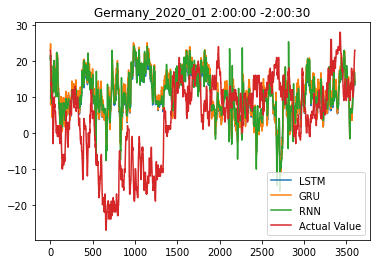

In [ ]:
import matplotlib.pyplot as plt

# lstm = scaler.inverse_transform(array(scores).reshape(-1,1))
# gru = scaler.inverse_transform(array(gru_scores).reshape(-1,1))
# rnn = scaler.inverse_transform(array(rnn_scores).reshape(-1,1))

lstm = scores
gru = gru_scores
rnn = rnn_scores
  
# create data
input = [i for i in range (predict_size)]
  
# plot lines
plt.plot(input, lstm, label = "LSTM")
plt.plot(input, gru, label = "GRU")
plt.plot(input, rnn, label = "RNN")
plt.plot(input, all_data[train_size: train_size + predict_size], label = "Actual Value")
plt.title('Germany_2020_01 2:00:00 -2:00:30')
plt.legend()
plt.show()

In [ ]:
from tabulate import tabulate
headers = ['Observed', 'LSTM', 'GRU', 'RNN']
table = zip(all_data[train_size: train_size + predict_size], lstm, gru, rnn_scores)
print(tabulate(table, headers=headers, floatfmt=".0f", tablefmt="grid"))

In [ ]:
from tabulate import tabulate
headers = ['Model', 'Loss', 'Absolute Loss', 'Max Loss', 'Min Loss']
model = ['gru', 'lstm', 'rnn']
loss = ['0.0014', '8.8547e-04', '0.0013']
re = ['214s/epoch', '213s/epoch', '912/epoch']
runtime = ['5293.636s', '5281.949s', '2290.520s']
abs_loss = [mean(gru_losses), mean(lstm_losses), mean(rnn_losses)]
max_loss = [gru_losses[argmax(gru_losses)], lstm_losses[argmax(lstm_losses)], rnn_losses[argmax(rnn_losses)]]
min_loss = [gru_losses[argmin(gru_losses)], lstm_losses[argmin(lstm_losses)], rnn_losses[argmin(rnn_losses)]]
table = zip(model, loss, abs_loss, max_loss, min_loss)
print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="grid"))

In [ ]:
print(std(gru_losses))